In [21]:
# Python modules
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import geopandas as gpd

# Own modules
import readFiles

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
print ("Current size:", fig_size)


Current size: [6.0, 4.0]
Current size: [12, 9]


In [2]:
data = gpd.read_file(r"C:\Users\Suvi\Dropbox\Tilastotieteen opinnot\Introduction to data science\miniproject\IntroData\vaki2016.json")
kunnat=gpd.read_file(r"C:\Users\Suvi\Dropbox\Tilastotieteen opinnot\Introduction to data science\miniproject\IntroData\kunnat.json")

In [39]:
vakiKunnat=pd.read_csv(r"C:\Users\Suvi\Dropbox\Tilastotieteen opinnot\Introduction to data science\miniproject\IntroData\vaerak_004_201600.csv",sep=';', header=1, encoding = "ISO-8859-1", dtype={'Alue': object})
vakiKunnat.columns=['sp','alue', 'ika', 'vuosi', 'vaesto']
vakiKunnat=vakiKunnat[['alue', 'ika', 'vuosi', 'vaesto']]
# Helsinki, Espoo, Kauniainen, Vantaa, Kerava, Sipoo ja Kirkkonummi
pksVector=pd.DataFrame(['049','091','092','235','245','257','753'])
pksVector.columns=['alue']
vakiKunnat=pd.merge(vakiKunnat, pksVector, on='alue')
vakiKunnat.head()
kunnat=pd.merge(kunnat, pksVector, how='inner', left_on="kunta", right_on="alue")

In [15]:
vakiKunnat2=pd.merge(kunnat, vakiKunnat, how='inner', left_on="kunta", right_on="alue")

In [16]:
vakiKunnat3=vakiKunnat2[vakiKunnat2['ika']=='Ikäluokat yhteensä']
vakiKunnat3=vakiKunnat3[['vuosi_y', 'alue', 'geometry', 'vaesto']]
#vaestoVuosi=
vaestoVuosi=pd.DataFrame(np.array(vakiKunnat3.groupby(['vuosi_y']).sum()))
vaestoVuosi['vuosi_y']=np.array(np.arange(1972, 2017, 1))
vaestoVuosi.columns=['vaestov','vuosi_y']


,vuosi_y,alue,geometry,vaesto,vaestov
0,1972,049,(POLYGON ((379927.2255999995 6671503.729800001...,107244,763890
1,1972,091,"(POLYGON ((401631.6167000001 6680071.1907, 401...",511823,763890
2,1972,092,(POLYGON ((396776.2517999997 6679289.143200001...,97062,763890
3,1972,235,(POLYGON ((373742.5828999998 6676148.814200001...,6496,763890
4,1972,245,"(POLYGON ((398036.7233999996 6692854.0296, 396...",16369,763890
5,1972,257,"(POLYGON ((368713.2981000002 6667949.9823, 368...",12676,763890
6,1972,753,(POLYGON ((409963.5224000001 6681658.341399999...,12220,763890
7,1973,049,(POLYGON ((379927.2255999995 6671503.729800001...,112969,776453
8,1973,091,"(POLYGON ((401631.6167000001 6680071.1907, 401...",509406,776453
9,1973,092,(POLYGON ((396776.2517999997 6679289.143200001...,103486,776453


In [ ]:
for i in np.arange(2016, 2017, 1):
    plotName="pks" + np.str(i) + ".png"
    plotteri=vakiKunnat3[vakiKunnat3["vuosi_y"]==i]
    fi=plotteri.plot(column='vaesto',scheme='fisher_jenks', k=3, cmap='viridis')
    plt.title(i)    
    fi.axis('off')
    plt.savefig(plotName, bbox_inches='tight')

In [24]:
pksVector.columns

Index(['alue'], dtype='object')

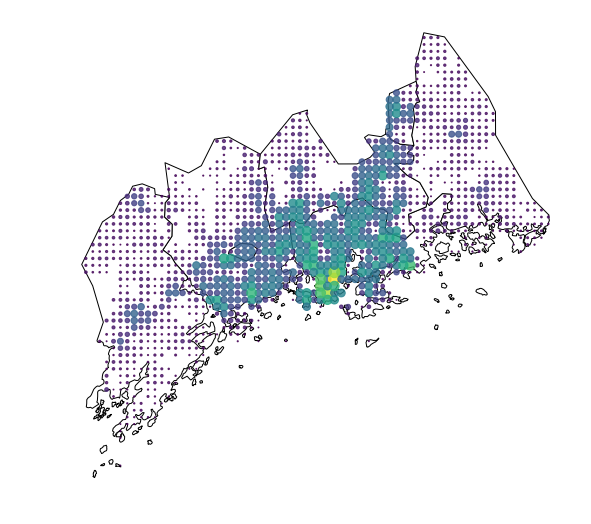

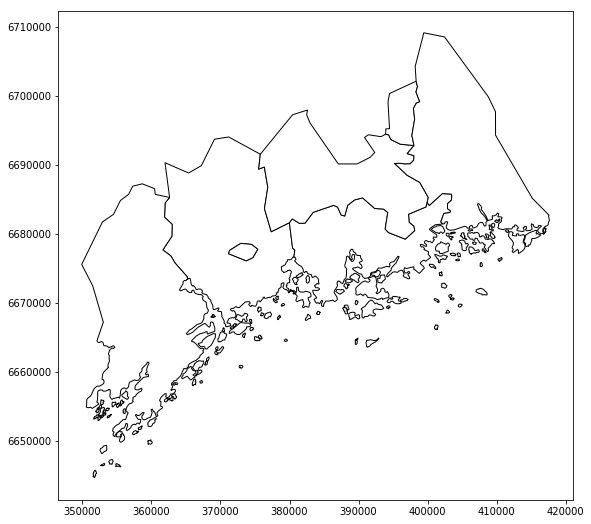

In [59]:
#xkoord=data[data['kunta']==91].xkoord
#ykoord=data[data['kunta']==91].ykoord
#colors=np.log(data[data['kunta']==91].vaesto)
data=pd.merge(data, pksVector, how='inner', left_on="kunta", right_on="alue")
#plt.hexbin(data.xkoord, data.ykoord, C=data.vaesto, cmap='viridis')

#import matplotlib.pyplot as plt
#from matplotlib import cm
#f = plt.figure()
#ax = f.add_subplot(111)
kunnat.plot(color='white', edgecolor='black')
plt.scatter(data.xkoord, data.ykoord, s=np.sqrt(data.vaesto), cmap='viridis', alpha=0.8, c=np.sqrt(data.vaesto))
plt.axis('off')
plt.show()
kunnat.plot(color='white', edgecolor='black')

#points=pd.read_csv("outputfilename.csv", header=None)
#plt.scatter(xkoord, ykoord , c=colors)
#plt.plot(points[0], points[1], '.')
#plt.show()

#heatmap, _, _ = np.histogram2d(data.xkoord, data.ykoord,bins=100,normed=True, weights=data.vaesto)

#plt.clf()
#plt.imshow(heatmap)
#plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# here are the three lists
# for example, you could do random values to demo
x = np.random.randn(8873)
y = np.random.randn(8873)
weights = np.random.rand(8873)

heatmap, _, _ = np.histogram2d(x, y, weights=weights)

plt.clf()
plt.imshow(heatmap)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

a = np.random.random((16, 16))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()
a[2]

In [61]:
print(np.max(data.xkoord), np.min(data.xkoord))
print(np.max(data.ykoord), np.min(data.ykoord))

417500 350500
6708500 6646500


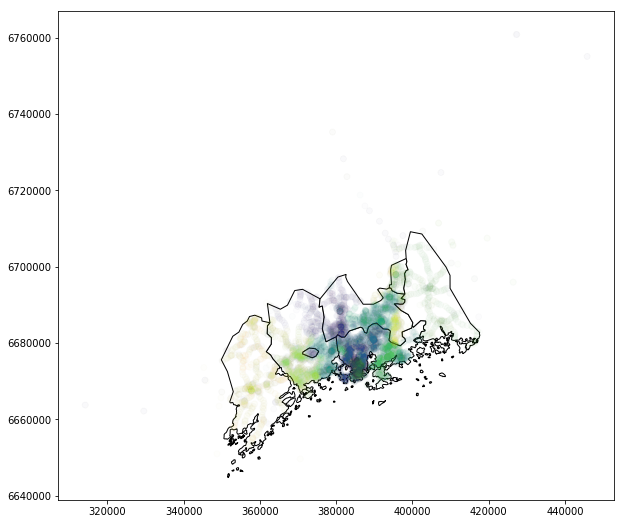

In [84]:
#import geopandas as 
stops = gpd.read_file(r'HSL_pysäkit\HSLn_pysäkit.shp')
stops=stops.to_crs({'init': 'epsg:3067'})
base=kunnat.plot(color='white', edgecolor='black')
stops.plot(ax=base, cmap='viridis', alpha=0.01)

